<a href="https://colab.research.google.com/github/kovacsanna77/szakdolgozat/blob/main/nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse as sp

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, f1_score, classification_report
from sklearn.metrics import mean_squared_error
import math
from urllib.parse import urlparse
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer # removing the commoner morphological and inflexional endings from words in English
from nltk.stem import WordNetLemmatizer #Lemmatization is the process of grouping together different inflected forms of the same word.
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
#Load up our stop words
stop_words = stopwords.words('english')
#Adds stuff to our stop words list


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Load df, filtered dfs

In [ ]:
import pandas as pd
import numpy as np

df_temp = pd.read_csv("/content/drive/MyDrive/Fake news/dataset_enti_sum_processed.csv", index_col=0)
#df, ahol  disinfos sum + nltk sum a real newsokra
df = pd.read_csv("/content/drive/MyDrive/Fake news/dataset_ent_sum.csv", index_col=0)

test = pd.read_csv('/content/drive/MyDrive/Fake news/test.csv', sep=';')


df_real = pd.read_csv('/content/drive/MyDrive/Fake news/real.csv', index_col=0)
df_fake = pd.read_csv('/content/drive/MyDrive/Fake news/fake.csv')

df_fake = df_fake.drop(columns= ['tags_list'])
df_real = df_real[df_real['year'] != 0]
#filter df, hogy nagyjából kiegyensúlyozottak legyenek az osztályok
df_fakefiltered = df_fake[df_fake['tags'].str.contains('war', case=False)| df_fake['tags'].str.contains('conspiracy', case=False) | df_fake['tags'].str.contains('War in Ukraine', case=False) | df_fake['tags'].str.contains('russia', case=False)| df_fake['tags'].str.contains('Ukraine', case=False)]

df_real["summary"] = df_real["content"]
df_fake['content'] = df_fake['summary']

In [ ]:
df_real

,title,content,author,url,date,year,month,day,regions,tags,summary,og_link,original_lang,label
0,"Ukraine war: Zelensky says 31,000 troops kille...","Volodymyr Zelensky says 31,000 Ukrainian soldi...",Kathryn Armstrong,https://bbc.com/news/world-europe-68397525,2024-02-25 00:00:00,2024.0,2.0,25.0,NaN,War in Ukraine,"Volodymyr Zelensky says 31,000 Ukrainian soldi...",https://bbc.com/news/world-europe-68397525,en,0
1,Ukrainian woman gives Welsh pub new lease of life,A woman who fled war-torn Ukraine hopes that r...,Andrew Arthur,https://bbc.com/news/articles/cj7vlvy1yvro,2024-03-05 00:00:00,2024.0,3.0,5.0,NaN,War in Ukraine,A woman who fled war-torn Ukraine hopes that r...,https://bbc.com/news/articles/cj7vlvy1yvro,en,0
2,Refugee returned to Kyiv due to state of UK home,A Ukrainian refugee returned to live in Kyiv r...,Gemma Dunstan,https://bbc.com/news/articles/c84jp1g2j71o,2024-03-14 00:00:00,2024.0,3.0,14.0,NaN,War in Ukraine,A Ukrainian refugee returned to live in Kyiv r...,https://bbc.com/news/articles/c84jp1g2j71o,en,0
3,The unlikely species entangled in Ukraine's re...,"Lawsuits, art and the sandy blind mole-rat hav...",Darya Tsymbalyuk,https://bbc.com/future/article/20240223-ukrain...,2024-02-24 00:00:00,2024.0,2.0,24.0,NaN,War in Ukraine,"Lawsuits, art and the sandy blind mole-rat hav...",https://bbc.com/future/article/20240223-ukrain...,en,0
4,Ukraine war: Vatican envoy called in over Pope...,Ukraine has summoned the Vatican's envoy after...,Kathryn Armstrong,https://bbc.com/news/world-europe-68538267,2024-03-11 00:00:00,2024.0,3.0,11.0,NaN,War in Ukraine,Ukraine has summoned the Vatican's envoy after...,https://bbc.com/news/world-europe-68538267,en,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6623,Democrats have the power but the insurrectioni...,As the U.S. braced for the possibility of more...,Jaisal Noor,https://therealnews.com/democrats-have-the-pow...,2021-01-15 00:00:00,2021.0,1.0,15.0,NaN,NaN,As the U.S. braced for the possibility of more...,https://therealnews.com/democrats-have-the-pow...,English,0
6624,Neo-fascists found their voice in Trump. Where...,As the U.S. braced for the possibility of more...,Marc Steiner,https://therealnews.com/neo-fascists-found-the...,2021-01-15 00:00:00,2021.0,1.0,15.0,NaN,NaN,As the U.S. braced for the possibility of more...,https://therealnews.com/neo-fascists-found-the...,English,0
6625,One frightening story reveals the true cost of...,As the U.S. braced for the possibility of more...,Taya Graham,https://therealnews.com/one-frightening-story-...,2021-01-14 00:00:00,2021.0,1.0,14.0,NaN,NaN,As the U.S. braced for the possibility of more...,https://therealnews.com/one-frightening-story-...,English,0
6626,"Yes, this kind of thing happens in America","On Monday, congressional Democrats began an at...",Jaisal Noor,https://therealnews.com/yes-this-kind-of-thing...,2021-01-12 00:00:00,2021.0,1.0,12.0,NaN,NaN,"On Monday, congressional Democrats began an at...",https://therealnews.com/yes-this-kind-of-thing...,English,0


In [ ]:
df_fakefiltered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6250 entries, 1 to 10163
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          6250 non-null   object
 1   author         6250 non-null   object
 2   url            6250 non-null   object
 3   date           6250 non-null   object
 4   year           6250 non-null   int64 
 5   month          6250 non-null   int64 
 6   day            6250 non-null   int64 
 7   regions        6250 non-null   object
 8   tags           6250 non-null   object
 9   summary        6092 non-null   object
 10  og_link        6178 non-null   object
 11  original_lang  6250 non-null   object
 12  label          6250 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 812.6+ KB


In [ ]:
df_fake.isna().sum()

title              0
author             0
url                0
date               0
year               0
month              0
day                0
regions            0
tags               0
summary          233
og_link           80
original_lang      0
label              0
content          233
dtype: int64

NameError: name 'df_temp' is not defined

In [ ]:
df_real['tags'] = "War in Ukraine"
df_real.head()
df_real.to_csv("real.csv")

### NLTK summary

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter

# Ensure you've downloaded the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def nltk_summarize(text, num_sentences=7):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    # Tokenize and lower case words, remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in word_tokenize(text) if word.lower() not in stop_words and word.isalnum()]

    # Count word frequencies
    word_frequencies = Counter(words)
    # Rank sentences by the sum of word frequencies
    sentence_ranks = {sentence: sum(word_frequencies[word.lower()] for word in word_tokenize(sentence) if word.lower() in word_frequencies and word.isalnum()) for sentence in sentences}
    # Select top N ranked sentences
    ranked_sentences = sorted(sentence_ranks, key=sentence_ranks.get, reverse=True)[:num_sentences]

    # Return concatenated top ranked sentences as the summary
    return ' '.join(ranked_sentences)

# Example usage




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_real['summary_nltk'] = df_real['content'].apply(lambda x: nltk_summarize(x) )


In [ ]:
df_fakefiltered.loc[:,'summary_nltk'] = df_fakefiltered['summary']
#df_fakefiltered['summarized_sumy'] = df_fakefiltered['summary']

df_fakefiltered.loc[:,'content'] = df_fakefiltered['summary']

<ipython-input-11-7db8705fb6e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fakefiltered.loc[:,'summary_nltk'] = df_fakefiltered['summary']
<ipython-input-11-7db8705fb6e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fakefiltered.loc[:,'content'] = df_fakefiltered['summary']


In [ ]:
df = pd.DataFrame()
df = pd.concat([df_fakefiltered, df_real])
random_indexes = np.random.randint(0,len(df),len(df))
df = df.iloc[random_indexes].reset_index(drop=True)
df = df.drop(columns= ['content'])

In [ ]:
df

,title,author,url,date,year,month,day,regions,tags,summary,og_link,original_lang,label,summary_nltk
0,There is a Western pressure campaign against R...,na,https://euvsdisinfo.eu/report/western-pressure...,2020-02-06,2020.0,2.0,6.0,"France, US, Russia","Russia Today (RT), Emmanuel Macron, Mainstream...",Western countries are carrying out a pressure ...,https://mundo.sputniknews.com/politica/2020020...,Spanish,1,Western countries are carrying out a pressure ...
1,World's most expensive cities: New York and Si...,Malu Cursino,https://bbc.com/news/world-63825214,2022-12-01 00:00:00,2022.0,12.0,1.0,NaN,War in Ukraine,The world's most expensive cities are jointly ...,https://bbc.com/news/world-63825214,en,0,1 = New York 1 = Singapore 3 = Tel Aviv 4 = Ho...
2,Ukraine: Bath woman says visa scheme an 'absol...,NaN,https://bbc.com/news/uk-england-somerset-61113570,2022-04-15 00:00:00,2022.0,4.0,15.0,NaN,War in Ukraine,A woman who has prepared her home for the arri...,https://bbc.com/news/uk-england-somerset-61113570,en,0,Five adults and two children have arrived in B...
3,Swedes cheer end of long wait to join Nato,Maddy Savage,https://bbc.com/news/world-europe-68509301,2024-03-08 00:00:00,2024.0,3.0,8.0,NaN,War in Ukraine,"Almost two years after applying to join Nato, ...",https://bbc.com/news/world-europe-68509301,en,0,"In early 2022, the country's then Social Democ..."
4,Misinformation spreads in China on ‘civil war’...,Kerry Allen,https://bbc.com/news/world-us-canada-68185317,2024-02-02 00:00:00,2024.0,2.0,2.0,NaN,War in Ukraine,Amid the escalating border standoff between Te...,https://bbc.com/news/world-us-canada-68185317,en,0,"A Voice of America journalist Wenhao, who spec..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12873,What’s next for Julian Assange,Alexander Zaitchik,https://therealnews.com/whats-next-for-julian-...,2024-02-23 00:00:00,2024.0,2.0,23.0,NaN,War in Ukraine,This story originally appeared in Truthdig on ...,https://therealnews.com/whats-next-for-julian-...,English,0,If the judges decide to buck Britain’s politic...
12874,Leaders of NATO's European countries are compl...,na,https://euvsdisinfo.eu/report/leaders-of-natos...,2021-10-22,2021.0,10.0,22.0,"EU, Europe, Russia, US","NATO, Warmongering, security threat, US presen...",The leaders of NATO's 28 European countries ar...,https://sputnik.az/20211022/nato-nun-problemi-...,Azerbaijani,1,The leaders of NATO's 28 European countries ar...
12875,Secret classes to counter Russian brainwashing...,Anastasiia Levchenko,https://bbc.com/news/world-68578822,2024-03-16 00:00:00,2024.0,3.0,16.0,NaN,War in Ukraine,"Like millions of other Ukrainians, in the earl...",https://bbc.com/news/world-68578822,en,0,"""It's not so important to teach children what ..."
12876,"Neo-Nazis commit genocide in Ukraine, Russia f...",na,https://euvsdisinfo.eu/report/neo-nazis-commit...,2022-02-25,2022.0,2.0,25.0,"Ukraine, Russia","War in Ukraine, Donbas, Genocide, Nazi/Fascist",Nobody intends to attack the Ukrainian people....,https://tass.com/politics/1411139,English,1,Nobody intends to attack the Ukrainian people....


In [ ]:
df  = df.dropna(subset = ['summary_nltk'])

In [ ]:
df.isna().sum()

title               0
author           1669
url                 0
date                8
year                8
month               8
day                 8
regions          6517
tags                0
summary             0
og_link            68
original_lang       0
label               0
summary_nltk        0
dtype: int64

## Sumy summarizer


In [ ]:
!pip install sumy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 41.3 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21693 sha256=af7d30f60a813dcd1202d290e542b0a3d1c0f3d0c7e2f9ccb73f17b1858c8e5a
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=a334a5b4a8815e2c2012a5fc1b615632ec0905ffbb6aaae48067fc3fb708a992
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt


In [ ]:
import pandas as pd
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer as Summarizer

# Assuming df is your DataFrame and 'summary' is the column you want to summarize
# Initialize the summarizer
summarizer = Summarizer()

# Function to summarize a single piece of text
def summarize_text(text, num_sentences=5):
    parser = PlaintextParser.from_string(text, Tokenizer('english'))
    summarized_text = ' '.join([' '.join(str(sentence) for sentence in summarizer(parser.document, num_sentences))])
    return summarized_text




In [ ]:
df_real['summarized_sumy'] = df_real['content'].apply(lambda x: summarize_text(x, 10))

## NER

In [ ]:
!pip install spacy


In [ ]:
import spacy

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

In [ ]:


def extract_custom_entities(text, desired_entities):
    doc = nlp(text)
    entities = set(ent.text.strip() for ent in doc.ents if desired_entities is None or ent.label_ in desired_entities)
    # Example for returning as a string, but can be modified to return a list



    unique_list = list(dict.fromkeys(entities))
    return ', '.join(sorted(entities))

# Specify the types of entities you want to extract
desired_entities = ['PERSON', 'ORG', 'GPE', 'LOC', 'NORP', 'DATE']






In [ ]:

df['entities'] = df['summary_nltk'].apply(lambda x: extract_custom_entities(x, desired_entities))

<ipython-input-21-00d7326484f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['entities'] = df['summary_nltk'].apply(lambda x: extract_custom_entities(x, desired_entities))


In [ ]:
df.to_csv('dataset_ent_sum.csv')

## Topic extraction

In [ ]:

def clean_text(s):
        s = s.lower()
        s = s.split()
        s = " ".join(s)
        s = re.sub(f'[{re.escape(str.punctuation)}]', '', s)

def remove_stop_words(s):
        stop_words = set(stopwords.words('english'))
        s = s.split()
        s = [w for w in s if not w.lower() in stop_words]
        s = " ".join(s)
        return s

In [ ]:
df_temp['summary_nltk'] = df_temp['summary_nltk'].fillna(" ")

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11941 entries, 0 to 11944
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          11941 non-null  object 
 1   author         10324 non-null  object 
 2   url            11941 non-null  object 
 3   date           11941 non-null  object 
 4   year           11941 non-null  float64
 5   month          11941 non-null  float64
 6   day            11941 non-null  float64
 7   regions        5342 non-null   object 
 8   tags           11941 non-null  object 
 9   summary        11941 non-null  object 
 10  og_link        11878 non-null  object 
 11  original_lang  11941 non-null  object 
 12  label          11941 non-null  int64  
 13  summary_nltk   11941 non-null  object 
 14  entities       11671 non-null  object 
 15  content_nltk   11941 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 1.5+ MB


In [ ]:
df_temp.isnull().sum()

title               0
author           1617
url                 0
date                0
year                0
month               0
day                 0
regions          6599
tags                0
summary             0
og_link            63
original_lang       0
label               0
summary_nltk        0
entities          270
content_nltk        0
dtype: int64

In [ ]:
from nltk.tokenize import sent_tokenize
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import decomposition
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize

from sklearn.feature_extraction.text import CountVectorizer
import re
documents = df_temp['summary_nltk']
# A simple preprocessing function
def preproc_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove words with 2 or fewer letters
    text = re.sub(r'[^a-z\s]', '', text)  # Remove all characters that are not letters
    return text

# Apply preprocessing
processed_docs = [preproc_text(doc) for doc in documents]
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(processed_docs)
from sklearn.decomposition import LatentDirichletAllocation

# Number of topics
n_topics = 20

lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(X)

# Get topics
topics = lda.components_
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
no_top_words = 5  # Number of top words to display for each topic

display_topics(lda, feature_names, no_top_words)





Topic 0:
ukraine russia russian said military
Topic 1:
appeared story originally shared permission
Topic 2:
ukraine russian russia ukrainian said
Topic 3:
said people ukraine refugees government
Topic 4:
said prices oil year food
Topic 5:
said government minister energy russia
Topic 6:
workers union labor strike people
Topic 7:
police city baltimore people cop
Topic 8:
russia ukraine nato russian west
Topic 9:
ukraine russian ukrainian said russia
Topic 10:
said people ukraine family home
Topic 11:
ukraine chris war hedges aid
Topic 12:
said israel ukraine song war
Topic 13:
israel israeli war gaza palestinian
Topic 14:
russian russia vaccine world media
Topic 15:
marc steiner media news world
Topic 16:
said university gaza time japan
Topic 17:
abortion people states new sports
Topic 18:
biden trump president house joe
Topic 19:
people sri lanka year history


Szövegklaszterezés -> topic extraction ?
első modellel tanítani
kommentelni, letisztítani a kódot

# Preprocess, ML, DL

### Preprocess

In [ ]:
df['summary_nltk'][0]

'Western countries are carrying out a pressure campaign against Russian media. US Congressmen and French president Emmanuel Macron accused RT and Sputnik, without evidence, of interfering in the elections of their countries.'

In [ ]:
df_temp = df

In [ ]:
def changeauthor(x):
  if x == 'na':
    return 'Unknown'
  else:
    return x

In [ ]:
df_temp['author'] = df['author'].apply(lambda x: changeauthor(x))

In [ ]:
df_temp.to_csv('dataset.csv')

In [ ]:
df_temp['author'] = df_temp['author'].fillna("Unknown")
#df_temp['content'] = df_temp['content'].fillna(" ")

df_temp = df_temp.dropna(subset = ['summary_nltk'])
#df_temp = df_temp.dropna(subset = ['summarized_sumy'])
df_temp = df_temp.dropna(subset = ['og_link'])
df_temp = df_temp.dropna(subset = ['date'])

In [ ]:
df_temp.isnull().sum()

title               0
author              0
url                 0
date                0
year                0
month               0
day                 0
regions          6401
tags                0
summary             0
og_link             0
original_lang       0
label               0
summary_nltk        0
entities          129
dtype: int64

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12520 entries, 0 to 12877
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          12520 non-null  object 
 1   author         12520 non-null  object 
 2   url            12520 non-null  object 
 3   date           12520 non-null  object 
 4   year           12520 non-null  float64
 5   month          12520 non-null  float64
 6   day            12520 non-null  float64
 7   regions        6119 non-null   object 
 8   tags           12520 non-null  object 
 9   summary        12520 non-null  object 
 10  og_link        12520 non-null  object 
 11  original_lang  12520 non-null  object 
 12  label          12520 non-null  int64  
 13  summary_nltk   12520 non-null  object 
 14  entities       12391 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 1.5+ MB


In [ ]:
df_temp['content'] =  df_temp['summary_nltk']  +", " + df_temp['title'] +", " + df_temp['author']
#df['content_sumy'] =  df['summarized_sumy'] + " " +  df['title']
#df= pd.read_csv('/content/drive/MyDrive/Fake news/dataset_enti_sum_processed.csv', index_col=0)

In [ ]:
df_temp.isna().sum()

In [ ]:
def preprocess_text(text):
    #print("\n Preprocessing: \n")
    # Convert to lowercase
    text = text.lower()
    #print("Lower: ", text)
    # Remove special characters and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # print("Special chars", text)
    # Tokenization
    words = word_tokenize(text)
    # print("Tokens", words)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    #print("Stopwordsd removed", words)
    #Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    #print("Stemmed" ,words)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    #print("Lemmatized", words)

    return ' '.join(words)

In [ ]:
df_temp['content'] = df_temp['content'].fillna("")

In [ ]:
df_temp['content'] = df_temp['content'].apply(preprocess_text)
#df['content_sumy'].apply(preprocess_text)


In [ ]:
df_temp['content'][0]

'western countri carri pressur campaign russian medium u congressman french presid emmanuel macron accus rt sputnik without evid interf elect countri western pressur campaign russian medium unknown'

In [ ]:
df_temp['content'] = df_temp['content'].str.replace(r"[\"'!@#$%^&*(){}[\]:;,<.>?/~`_+=|-]", '', regex=True)
#df['content_sumy'] =  df['content_sumy'].str.replace(r"[\"'!@#$%^&*(){}[\]:;,<.>?/~`_+=|-]", '', regex=True)

## Training

### First ~3000 data

In [ ]:
tfidf_first = TfidfVectorizer() # Limiting to 1000 features for demonstration
tfidf_features = tfidf_first.fit_transform(df_first['content_nltk'])

# Combine all features into a single feature matrix
# Note: Ensure all feature matrices have the same number of rows
features_combined = sp.hstack((tfidf_features, df_first[['year', 'month', 'day']].values), format='csr')

# Target variable
y = df_first['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_combined, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_first = RandomForestClassifier(random_state=42)
rf_first.fit(X_train, y_train)

In [ ]:
from sklearn import svm
svm_first = svm.SVC(kernel='linear')

svm_first.fit(X_train, y_train)

In [ ]:
lg_first = LogisticRegression()
lg_first.fit(X_train, y_train)

In [ ]:
predictions_first = rf_first.predict(X_test)
pred_svm_f =svm_first.predict(X_test)

pred_lg_f = lg_first.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score


accuracy_f = accuracy_score(y_test, predictions_first)#
accuracy_svm_f= accuracy_score(y_test, pred_svm_f)

accuracy_lg_F= accuracy_score(y_test, pred_lg_f)

f1_F = f1_score(y_test, predictions_first, average='binary')
f1_svm_F= f1_score(y_test, pred_svm_f, average='binary')
f1_lg_F = f1_score(y_test, pred_lg_f, average='binary')

print(f"Accuracy RF: {accuracy_f}")
print(f"Accuracy SVM: {accuracy_svm_f}")

print(f"Accuracy LG: {accuracy_lg_F}")
print(f"F1 Score: {f1_F}")
print(f"F1 Score SVM: {f1_svm_F}")
print(f"F1 Score LG: {f1_lg_F}")

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions_first)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### With all data

In [ ]:
df_temp = df_temp.dropna(subset = ['summary_nltk'])

In [ ]:
df_temp.isna().sum()

title               0
author              0
url                 0
date                0
year                0
month               0
day                 0
regions          6401
tags                0
summary             0
og_link             0
original_lang       0
label               0
summary_nltk        0
entities          129
content             0
dtype: int64

In [ ]:
tfidf_vectorizer = TfidfVectorizer() # Limiting to 1000 features for demonstration
tfidf_features = tfidf_vectorizer.fit_transform(df_temp['content'])

# Combine all features into a single feature matrix
# Note: Ensure all feature matrices have the same number of rows
features_combined = sp.hstack((tfidf_features, df_temp[['year', 'month', 'day']].values), format='csr')

# Target variable
y = df_temp['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_combined, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear')

svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = rf_model.predict(X_test)
pred_svm =svm_model.predict(X_test)

pred_lg = lg_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report


accuracy = accuracy_score(y_test, predictions)#
accuracy_svm= accuracy_score(y_test, pred_svm)

accuracy_lg= accuracy_score(y_test, pred_lg)

f1 = f1_score(y_test, predictions, average='binary')
f1_svm = f1_score(y_test, pred_svm, average='binary')
f1_lg = f1_score(y_test, pred_lg, average='binary')

print(f"Accuracy RF: {accuracy}")
print(f"Accuracy SVM: {accuracy_svm}")

print(f"Accuracy LG: {accuracy_lg}")
print(f"F1 Score: {f1}")
print(f"F1 Score SVM: {f1_svm}")
print(f"F1 Score LG: {f1_lg}")

print(classification_report(y_test,predictions))

Accuracy RF: 0.9880191693290735
Accuracy SVM: 0.9644568690095847
Accuracy LG: 0.9952076677316294
F1 Score: 0.988
F1 Score SVM: 0.9630552096305521
F1 Score LG: 0.9951690821256038
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1262
           1       0.98      0.99      0.99      1242

    accuracy                           0.99      2504
   macro avg       0.99      0.99      0.99      2504
weighted avg       0.99      0.99      0.99      2504



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Create a Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on the test set
nb_predictions = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Naive Bayes Classifier Report:")
print(classification_report(y_test, nb_predictions))


Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1262
           1       0.96      1.00      0.98      1242

    accuracy                           0.98      2504
   macro avg       0.98      0.98      0.98      2504
weighted avg       0.98      0.98      0.98      2504



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GBM classifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
gbm_classifier.fit(X_train, y_train)

# Predict on the test set
gbm_predictions = gbm_classifier.predict(X_test)

# Evaluate the classifier
print("Gradient Boosting Machine Classifier Report:")
print(classification_report(y_test, gbm_predictions))


Gradient Boosting Machine Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1262
           1       1.00      1.00      1.00      1242

    accuracy                           1.00      2504
   macro avg       1.00      1.00      1.00      2504
weighted avg       1.00      1.00      1.00      2504



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # cv=5 specifies the number of folds

print("Accuracy scores for each fold:", scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))

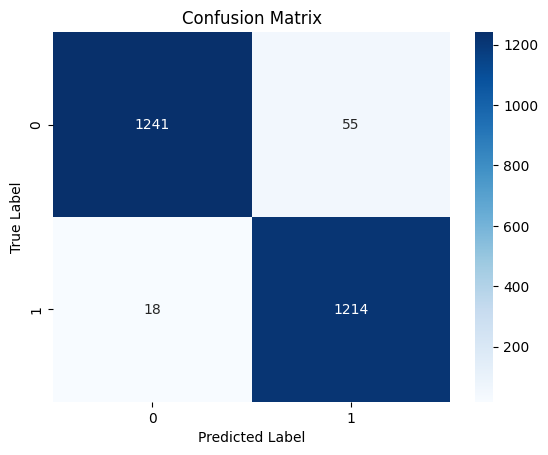

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Assuming y_true is your array of actual labels (e.g., 0 for fake, 1 for real)
# y_pred is your array of predicted labels
# texts is your array of news articles or statements
 # Your predicted labels
texts = df['content_nltk']   # Your textual data
url = df['url']
dates = df['date']
entities = df['entities']
# Identify indices where the prediction was incorrect
mislabeled_indices = np.where(y_test != predictions)[0]

# Print out or inspect some of the mislabeled instances
for index in mislabeled_indices[:100]:  # Adjust the number based on your needs
    print(f"Text: {texts[index]}")
    print(f"Url: {url[index]}")
    print(f"Date: {dates[index]}")
    print(f"Entities: {entities[index]}")
    print(f"Actual Label: {'Real' if y_test[index] == 1 else 'Fake'}, Predicted Label: {'Real' if predictions[index] == 1 else 'Fake'}")
    print("-" * 80)


### Test

In [ ]:
import scipy.sparse as sp
from joblib import load



# Example new data
false = "Ukraine openly admits its responsibility for the terrorist attack on Crocus City Hall. The fact that the leadership of the Ukrainian security services confirms it, proves once again the connection between the Kyiv regime and the organisers and perpetrators of this crime. Ukraine admits its responsibility for the terrorist attack on Crocus City Hall Unkknown "
true = "British Foreign Secretary David Cameron has said US President Joe Biden is “rightly pressing [Israeli Prime Minister Benjamin] Netanyahu” for a pause in fighting to allow for more humanitarian aid. In an interview with CNN’s John Berman on Wednesday, Cameron said he agrees with Biden that a temporary ceasefire is needed. It comes after Biden offered one of his sharpest rebukes of Israel’s handling of the war in Gaza during an interview Tuesday,describing Israeli Prime Minister Benjamin Netanyahu’s approach to the conflict as a “mistake” and calling for a halt to the fighting.“He is rightly pressing Netanyahu, as I have many times that we need a pause in fighting to get aid in and hostages out,” Cameron said. “That’s long been Britain’s position,” he added. "
new_article_year = 2024
new_article_month = 4
new_article_day = 10

# Preprocess the new article content (if you have specific preprocessing steps)
new_article_content = preprocess_text(false) # Define this based on your preprocessing
new_article_content = new_article_content.replace(r"[\"'!@#$%^&*(){}[\]:;,<.>?/~`_+=|-]", '')
# Transform the new article content with the trained TF-IDF vectorizer
X_new_tfidf = tfidf_vectorizer.transform([new_article_content])

# Transform the new article domain with the trained OneHotEncoder

# Combine all new article features into a single feature matrix
X_new_combined = sp.hstack((X_new_tfidf, [[new_article_year, new_article_month, new_article_day]]), format='csr')

# Predict using the trained model
prediction =rf_model.predict(X_new_combined)

print("Prediction:", prediction)

Prediction: [1]


In [ ]:
df_temp.head()

## LSTM

### 3000

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

preprocessed_texts = df_first['content_nltk']
labels = df_first['label']
# Tokenization and padding
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(preprocessed_texts)
sequences = tokenizer.texts_to_sequences(preprocessed_texts)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df_first[['year', 'month', 'day']])


# Calculate the length of each sequence
sequence_lengths = [len(seq) for seq in sequences]

# Find the maximum length
max_length = max(sequence_lengths)
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the LSTM model
embedded_features = 40
model = Sequential()
model.add(Embedding(5000,embedded_features))
model.add(LSTM(64))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam',metrics = ['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

### all

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

preprocessed_texts = df_temp['content']
labels = df_temp['label']
# Tokenization and padding
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(preprocessed_texts)
sequences = tokenizer.texts_to_sequences(preprocessed_texts)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df_temp[['year', 'month', 'day']])


# Calculate the length of each sequence
sequence_lengths = [len(seq) for seq in sequences]

# Find the maximum length
max_length = max(sequence_lengths)
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Splitting the dataset
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the LSTM model
embedded_features = 40
model = Sequential()
model.add(Embedding(5000,embedded_features))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer= 'adam',metrics = ['accuracy'])

# Train the model



In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier
def model():
  model = Sequential()
  model.add(Embedding(5000,embedded_features))
  model.add(LSTM(64))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss = 'binary_crossentropy', optimizer= 'adam',metrics = ['accuracy'])

  return model
model = KerasClassifier(build_fn=model, verbose=0)


In [ ]:

from sklearn.model_selection import GridSearchCV
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.986251 using {'optimizer': 'Nadam'}


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
316/316 [==============================] - 80s 243ms/step - loss: 0.1403 - accuracy: 0.9492 - val_loss: 0.0252 - val_accuracy: 0.9941
Epoch 2/10
316/316 [==============================] - 67s 213ms/step - loss: 0.0874 - accuracy: 0.9752 - val_loss: 0.0229 - val_accuracy: 0.9925
Epoch 3/10
316/316 [==============================] - 68s 214ms/step - loss: 0.0086 - accuracy: 0.9980 - val_loss: 0.0159 - val_accuracy: 0.9941
Epoch 4/10
316/316 [==============================] - 73s 232ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0115 - val_accuracy: 0.9968
Epoch 5/10
316/316 [==============================] - 84s 266ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0109 - val_accuracy: 0.9972
Epoch 6/10
316/316 [==============================] - 69s 217ms/step - loss: 8.4644e-04 - accuracy: 0.9998 - val_loss: 0.0127 - val_accuracy: 0.9968
Epoch 7/10
316/316 [==============================] - 68s 215ms/step - loss: 4.9193e-04 - accuracy: 0.9999 - val_loss: 0.0128 

In [ ]:
false = "Back in mid-March, the director of the Foreign Intelligence Service confirmed that France was preparing to send about 2000 military personnel to Ukraine at the initial stage. Moscow clarified: they will arrive in April.In short, although Paris declares that it will act at its own peril and risk, and NATO does not promise to help Paris, such a mess may brew that the Third World War will become a reality. And Macron doesn’t need this at all.So the French President sent minister Lecornu to persuade Shoigu: we know that you have iron discipline in your army, please order your generals not to touch our soldiers, we will quietly, purely symbolically, settle somewhere in Odessa, and after the conclusion of peace or a truce we will go home. "
true = "British Foreign Secretary David Cameron has said US President Joe Biden is “rightly pressing [Israeli Prime Minister Benjamin] Netanyahu” for a pause in fighting to allow for more humanitarian aid. In an interview with CNN’s John Berman on Wednesday, Cameron said he agrees with Biden that a temporary ceasefire is needed. It comes after Biden offered one of his sharpest rebukes of Israel’s handling of the war in Gaza during an interview Tuesday,describing Israeli Prime Minister Benjamin Netanyahu’s approach to the conflict as a “mistake” and calling for a halt to the fighting.“He is rightly pressing Netanyahu, as I have many times that we need a pause in fighting to get aid in and hostages out,” Cameron said. “That’s long been Britain’s position,” he added. "
# Tokenize and pad the new text
seq = tokenizer.texts_to_sequences([false])
padded_seq = pad_sequences(seq, maxlen=max_length)

# Predict
prediction = model.predict(padded_seq)
predicted_label = (prediction > 0.5).astype(int)

# Interpret the predicted label
if predicted_label[0][0] == 1:
    print("Predicted label: False")
else:
    print("Predicted label: True")


1/1 [==============================] - 0s 52ms/step
Predicted label: True


algoritmus verseny
legjobban teljesítő -> fine tune